<a href="https://colab.research.google.com/github/Akikan12/Public_Pro/blob/main/03_split_panel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import random
import os
import cv2  # OpenCVライブラリをインポート
import numpy as np  # 数値計算用のnumpyライブラリをインポート
from google.colab.patches import cv2_imshow  # Google Colab用の画像表示関数をインポート

def split_image(image_path, num_rows, num_cols):
    try:
        # 画像を開く
        original_image = Image.open(image_path)
    except IOError:
        print("Error: 画像を読み込めませんでした")
        return None
    #画像の場所を取得
    output_dir="/content/drive/MyDrive/Game/Figure/output_2"

    # 画像のサイズを取得
    width, height = original_image.size

    # 1つのパネルのサイズを計算
    panel_width = width // num_cols
    panel_height = height // num_rows

    # 分割されたパネルを格納するリスト
    panels = []

    # 画像をパネルに分割
    for row in range(num_rows):
        for col in range(num_cols):
            # パネルの座標を計算
            left = col * panel_width
            top = row * panel_height
            right = left + panel_width
            bottom = top + panel_height
            # パネルを切り取り
            panel = original_image.crop((left, top, right, bottom))
            panels.append(panel)

            # 分割されたパネルを画像として保存
            if output_dir:
                if not os.path.exists(output_dir):
                    os.mkdir(output_dir)
                panel.save(os.path.join(output_dir, f"panel_{row}_{col}.png"))

    # パネルをランダムに並び替える
    random.shuffle(panels)

    return panels,output_dir

def panel_function(output_dir,num_rows, num_cols):

  # 縦・横にタイル状に連結（結合）するための関数を定義
  def concat_tile(im_list_2d):
      return cv2.vconcat([cv2.hconcat(im_list_h) for im_list_h in im_list_2d])

  # ディレクトリ内の画像ファイルのリストを作成
  image_file = [
      f for f in os.listdir(output_dir) if os.path.isfile(os.path.join(output_dir, f))
  ]

  # 画像の配列を作成(Z方向)
  re_image_array = []  # 画像配列を格納するためのリストを初期化
  for i in range(num_rows):  # 行ごとに繰り返し処理
      row_images = []  # 各行の画像を格納するためのリストを初期化
      for j in range(num_cols):  # 列ごとに繰り返し処理
          file = image_file[i * num_cols + j]  # インデックスに基づいて画像ファイルを選択(計算結果が0,1,2,3となる)
          src = cv2.imread(os.path.join(output_dir, file))  # 画像を読み込む
          re_image = cv2.resize(src, dsize=(0, 0), fx=0.5, fy=0.5)  # 画像をリサイズする
          row_images.append(re_image)  # リサイズされた画像を行のリストに追加
      re_image_array.append(row_images)  # 行ごとのリストを全体の画像配列に追加

  # 結合結果を取得し、画像を表示
  im_tile = concat_tile(re_image_array)  # 画像配列を結合してタイル状にする
  cv2_imshow(im_tile)  # 画像を表示
  cv2.waitKey(0)
  cv2.destroyAllWindows()
  cv2.imwrite("/content/drive/MyDrive/Game/Figure/sum.jpg", im_tile)  # 画像をファイルに保存

  print("次のパネルを並び替えてください")

  print("パネルは左上が座標[0,0]です")

  return im_tile,re_image_array,concat_tile

# 画像のパス
image_path = "/content/drive/MyDrive/Game/Program/input_image.jpg"

# パネルの行数と列数を設定
num_rows = 2  # タイル状に結合する行数
num_cols = 2  # タイル状に結合する列数

# 画像をランダムに分割
panels,output_dir = split_image(image_path, num_rows, num_cols)

if panels is not None:
    print("画像をランダムに分割しました")
    # 分割された各パネルを表示するか、保存するなどの操作を追加できます
else:
    print("画像のランダム分割中にエラーが発生しました")

#パネルの生成
while True:
    # 関数を実行
    im_tile, re_image_array, concat_tile = panel_function(output_dir,num_rows, num_cols)
    ans = input("画像が確認できましたか？ y/n > ")

    # ユーザーが特定の条件を入力した場合、ループを抜けるなどの処理を行うことができます
    if ans == "y":
        new_re_image_array = np.empty_like(re_image_array)  # 元の配列と同じサイズの新しい配列を作成
        for i in range(num_rows):  # 行を先にループする
            for j in range(num_cols):
                print("{}行{}列目のパネルの座標を入力してください".format(i, j))
                r_i = int(input("[i]>"))
                c_j = int(input("[j]>"))
                print("x={}, y={}".format(r_i, c_j))
                new_re_image_array[i][j] = re_image_array[r_i][c_j]  # 新しい配列に要素をコピー
        re_image_array = new_re_image_array  # 新しい配列で元の配列を更新
    else:
        # 関数を実行に戻る
        continue

    re_im_tile = concat_tile(re_image_array)
    print("並び替え結果は次のようになります")
    cv2_imshow(re_im_tile)
    ans_2 = input("この画像で合っていますか？ y/n > ")
    if ans_2 == "y":
        cv2.imwrite("/content/drive/MyDrive/Game/Figure/re_sum.jpg", re_im_tile)
        print("ゲームを終了します")
        break
    else:
        continue  # 処理をスキップし関数の実行まで戻る


生成した画像の情報を保存して次に反映する

画像をランダムに分割しました
次のパネルを並び替えてください
パネルは左上が座標[0,0]です
画像が確認できましたか？ y/n > n


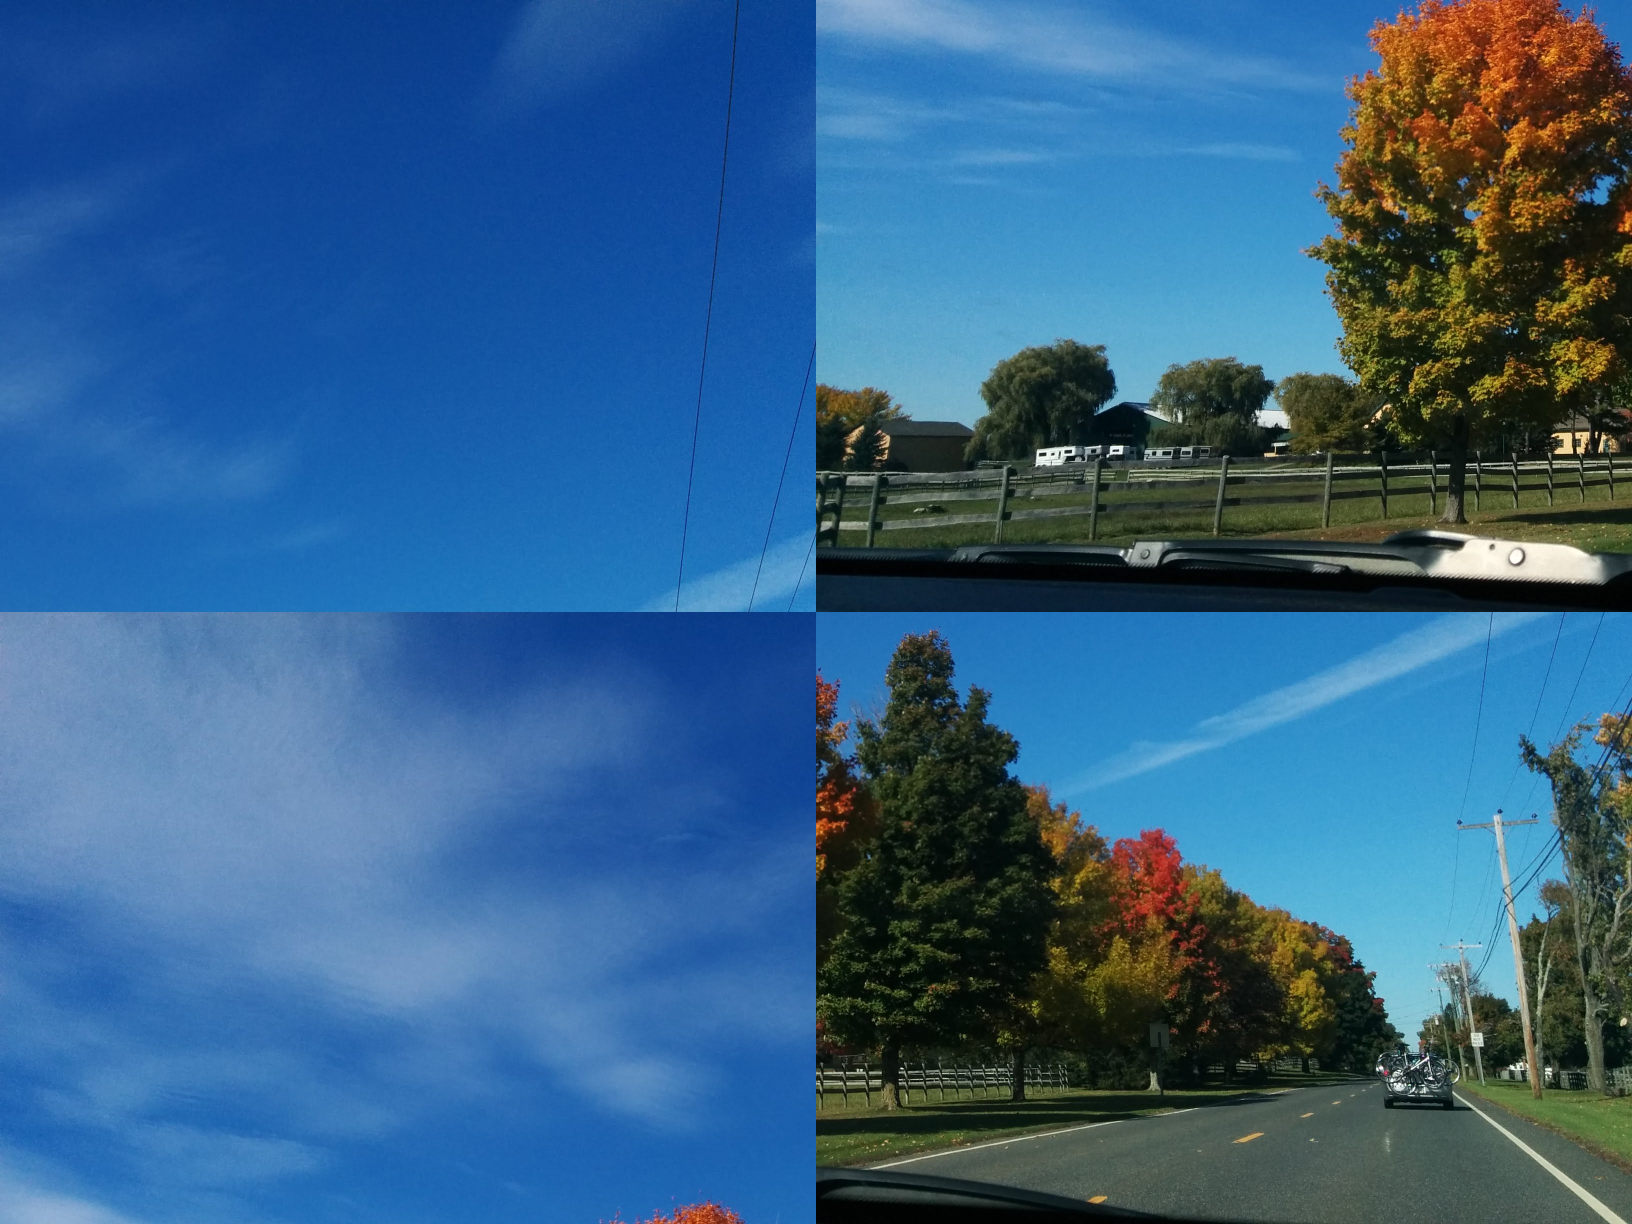

画像が確認できましたか？ y/n > y
0行0列目のパネルの座標を入力してください
[i]>1
[j]>0
x=1, y=0
0行1列目のパネルの座標を入力してください
[i]>0
[j]>0
x=0, y=0
1行0列目のパネルの座標を入力してください
[i]>0
[j]>1
x=0, y=1
1行1列目のパネルの座標を入力してください
[i]>1
[j]>1
x=1, y=1
並び替え結果は次のようになります


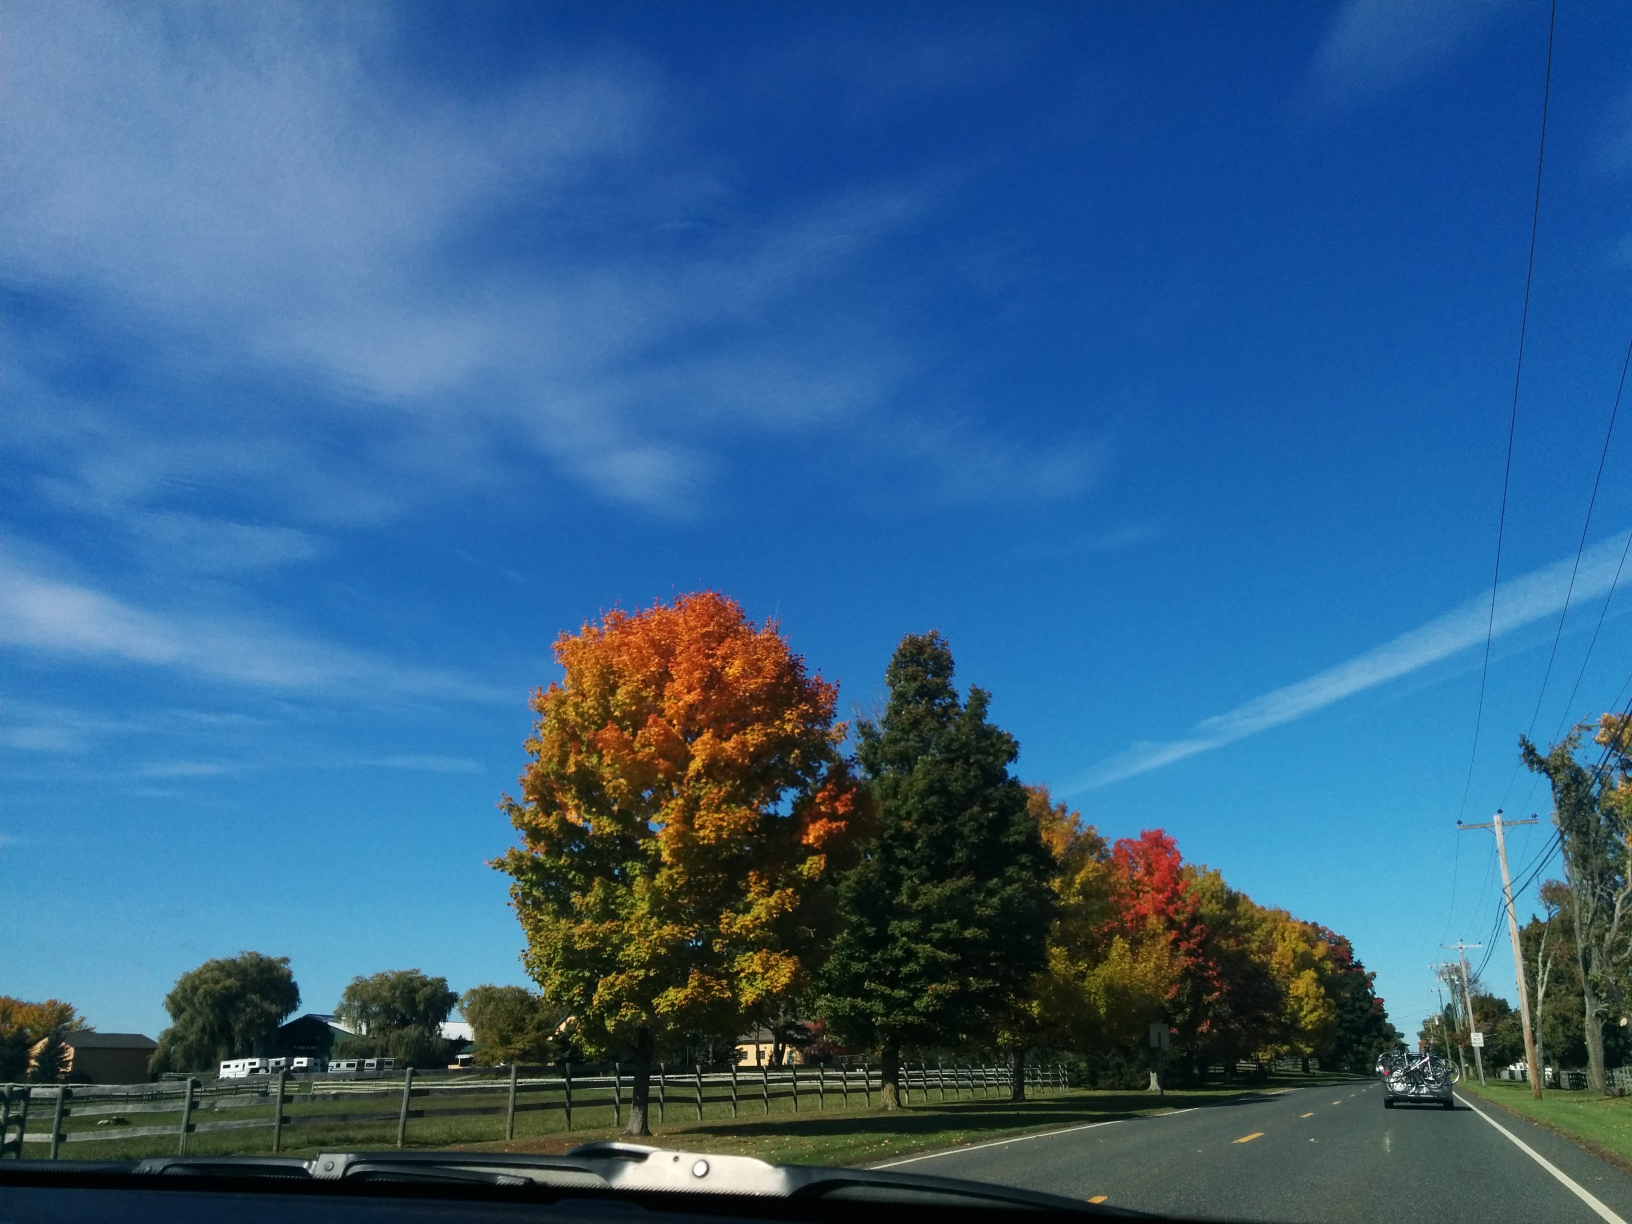

この画像で合っていますか？ y/n > n
並び替えを続けてください
画像が確認できましたか？ y/n > y
0行0列目のパネルの座標を入力してください
[i]>1
[j]>1
x=1, y=1
0行1列目のパネルの座標を入力してください
[i]>0
[j]>1
x=0, y=1
1行0列目のパネルの座標を入力してください
[i]>1
[j]>0
x=1, y=0
1行1列目のパネルの座標を入力してください
[i]>0
[j]>0
x=0, y=0
並び替え結果は次のようになります


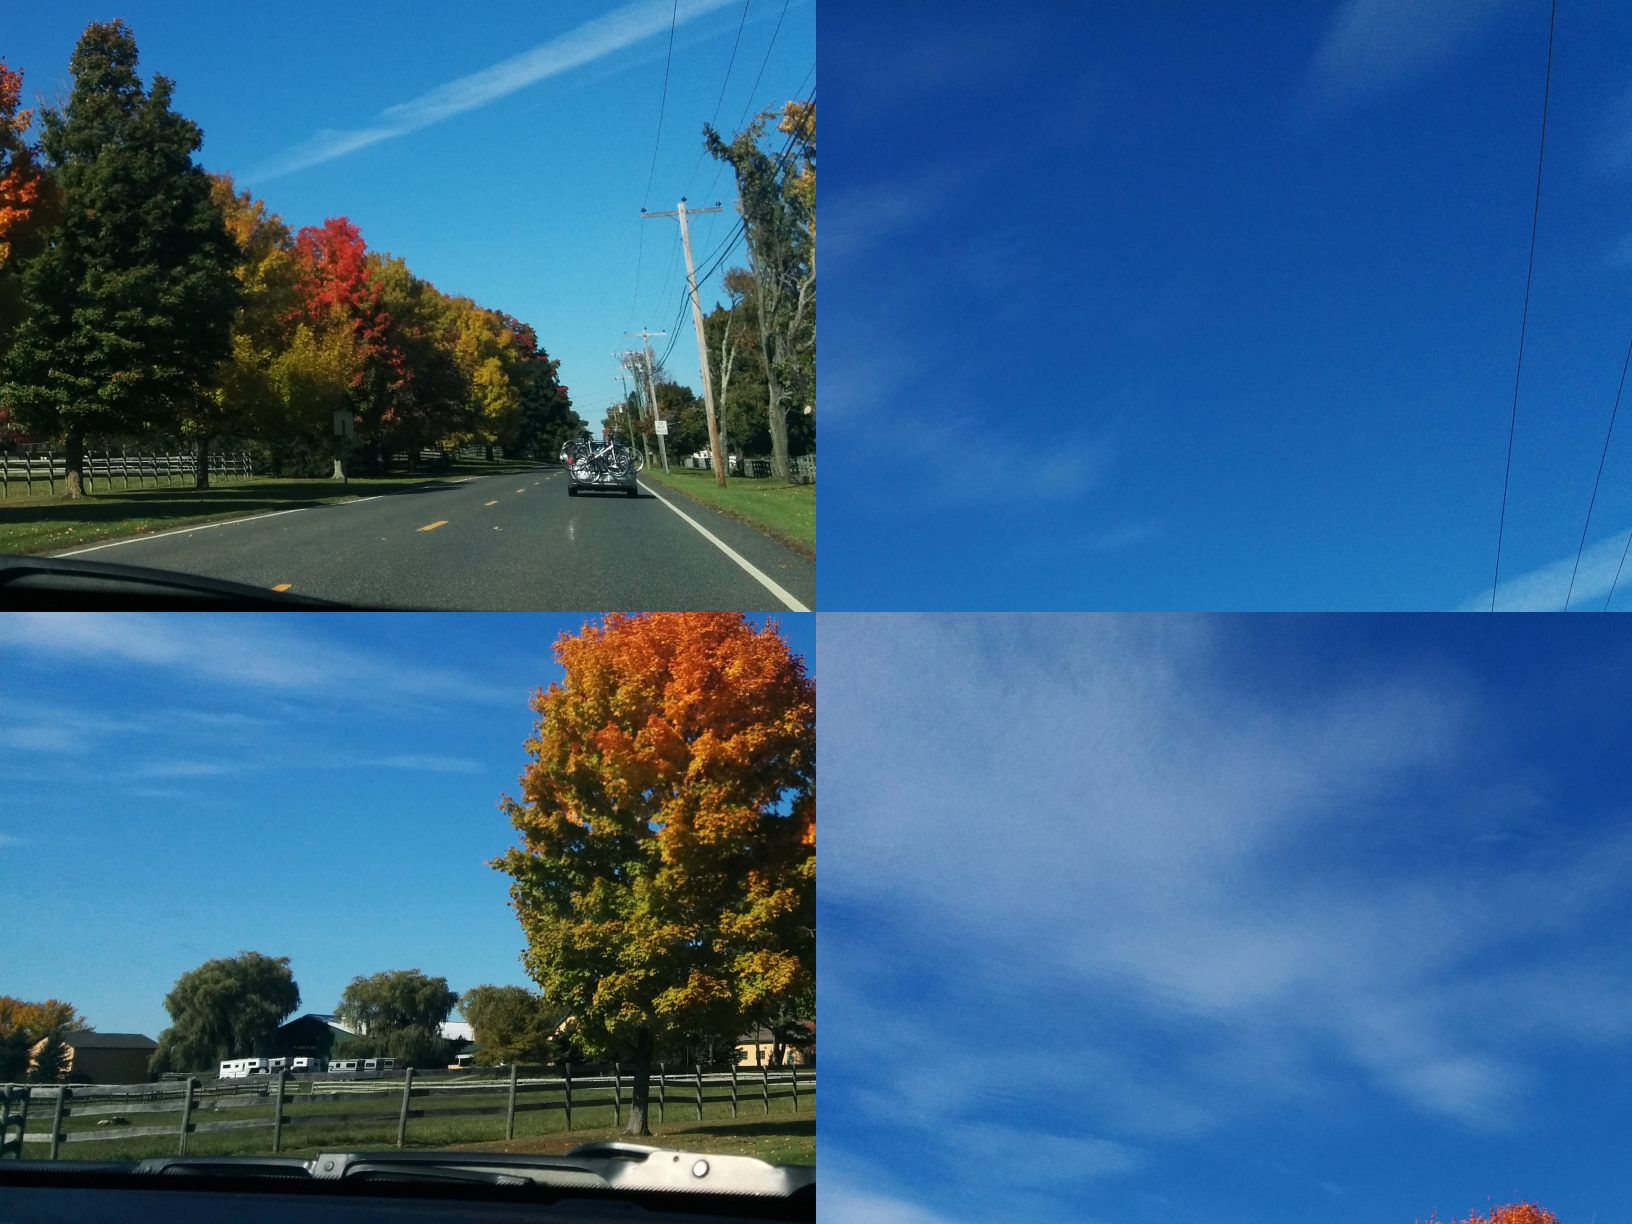

この画像で合っていますか？ y/n > y
ゲームを終了します


In [15]:
from PIL import Image
import random
import os
import cv2  # OpenCVライブラリをインポート
import numpy as np  # 数値計算用のnumpyライブラリをインポート
from google.colab.patches import cv2_imshow  # Google Colab用の画像表示関数をインポート

def split_image(image_path, num_rows, num_cols):
    try:
        # 画像を開く
        original_image = Image.open(image_path)
    except IOError:
        print("Error: 画像を読み込めませんでした")
        return None
    #画像の場所を取得
    output_dir="/content/drive/MyDrive/Game/Figure/output_222"

    # 画像のサイズを取得
    width, height = original_image.size

    # 1つのパネルのサイズを計算
    panel_width = width // num_cols
    panel_height = height // num_rows

    # 分割されたパネルを格納するリスト
    panels = []

    # 画像をパネルに分割
    for row in range(num_rows):
        for col in range(num_cols):
            # パネルの座標を計算
            left = col * panel_width
            top = row * panel_height
            right = left + panel_width
            bottom = top + panel_height
            # パネルを切り取り
            panel = original_image.crop((left, top, right, bottom))
            panels.append(panel)

            # 分割されたパネルを画像として保存
            if output_dir:
                if not os.path.exists(output_dir):
                    os.mkdir(output_dir)
                panel.save(os.path.join(output_dir, f"panel_{row}_{col}.png"))

    return panels,output_dir

def panel_function(output_dir,num_rows, num_cols):

  # 縦・横にタイル状に連結（結合）するための関数を定義
  def concat_tile(im_list_2d):
      return cv2.vconcat([cv2.hconcat(im_list_h) for im_list_h in im_list_2d])

  # ディレクトリ内の画像ファイルのリストを作成
  image_file = [
      f for f in os.listdir(output_dir) if os.path.isfile(os.path.join(output_dir, f))
  ]

  # パネルをランダムに並び替える
  random.shuffle(image_file)

  # 画像の配列を作成(Z方向)
  re_image_array = []  # 画像配列を格納するためのリストを初期化
  for i in range(num_rows):  # 行ごとに繰り返し処理
      row_images = []  # 各行の画像を格納するためのリストを初期化
      for j in range(num_cols):  # 列ごとに繰り返し処理
          file = image_file[i * num_cols + j]  # インデックスに基づいて画像ファイルを選択(計算結果が0,1,2,3となる)
          src = cv2.imread(os.path.join(output_dir, file))  # 画像を読み込む
          re_image = cv2.resize(src, dsize=(0, 0), fx=0.5, fy=0.5)  # 画像をリサイズする
          row_images.append(re_image)  # リサイズされた画像を行のリストに追加
      re_image_array.append(row_images)  # 行ごとのリストを全体の画像配列に追加

  im_tile = concat_tile(re_image_array)  # 画像配列を結合してタイル状にする
  cv2.imwrite("/content/drive/MyDrive/Game/Figure/sum.jpg", im_tile)  # 画像をファイルに保存

  print("次のパネルを並び替えてください")

  print("パネルは左上が座標[0,0]です")

  return im_tile,re_image_array,concat_tile

# 画像のパス
image_path = "/content/drive/MyDrive/Game/Program/input_image.jpg"

# パネルの行数と列数を設定
num_rows = 2  # タイル状に結合する行数
num_cols = 2  # タイル状に結合する列数

# 画像をランダムに分割
panels,output_dir = split_image(image_path, num_rows, num_cols)

if panels is not None:
    print("画像をランダムに分割しました")
    # 分割された各パネルを表示するか、保存するなどの操作を追加できます
else:
    print("画像のランダム分割中にエラーが発生しました")

#パネルの生成

# 関数を実行
im_tile, re_image_array, concat_tile = panel_function(output_dir,num_rows, num_cols)
cv2_imshow(im_tile)  # 画像を表示
cv2.waitKey(0)
cv2.destroyAllWindows()

# 結合結果を取得し、画像を表示

while True:
    ans = input("画像が確認できましたか？ y/n > ")

    # ユーザーが特定の条件を入力した場合、ループを抜けるなどの処理を行うことができます
    if ans == "y":
        new_re_image_array = np.empty_like(re_image_array)  # 元の配列と同じサイズの新しい配列を作成
        for i in range(num_rows):  # 行を先にループする
            for j in range(num_cols):
                print("{}行{}列目のパネルの座標を入力してください".format(i, j))
                r_i = int(input("[i]>"))
                c_j = int(input("[j]>"))
                print("x={}, y={}".format(r_i, c_j))
                new_re_image_array[i][j] = re_image_array[r_i][c_j]  # 新しい配列に要素をコピー
        re_image_array = new_re_image_array  # 新しい配列で元の配列を更新
    else:
        # 関数を実行に戻る
        continue

    re_im_tile = concat_tile(re_image_array) #配置後のパネルをつなげる
    print("並び替え結果は次のようになります")
    cv2_imshow(re_im_tile)
    ans_2 = input("この画像で合っていますか？ y/n > ")
    if ans_2 == "y":
        cv2.imwrite("/content/drive/MyDrive/Game/Figure/re_sum.jpg", re_im_tile)
        print("ゲームを終了します")
        break
    else:
        print("並び替えを続けてください")
        continue  # 以降の処理をスキップする


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


操作性の向上: ユーザーがパネルをドラッグ＆ドロップで移動させるなど、操作性を向上させる機能を追加します。また、移動可能なパネルに目印をつけることで、ユーザーが移動可能なパネルを識別しやすくします。



時間計測: ユーザーがゲームをクリアするまでの時間を計測し、記録する機能を追加します。これにより、ユーザーが自己ベストタイムを目指せるようになります。